## ***INSTALL ALL THE REQUIRED LIBRARIES***

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
!pip install ipywidgets
import ipywidgets as widgets
from PIL import Image
import io
import numpy as np

## ***LOAD THE DATASET***

In [2]:

excel_file_path = '/content/drive/MyDrive/archive (3)/Segmentation.csv'

segmentation_df = pd.read_csv(excel_file_path)

print(segmentation_df.head())
segmentation_df.head()

   Width  Height Mode Format  SizeBytes  FileSize FileSizeUnit  ClassId  \
0    133     115  RGB    PNG       2943      2.87           KB        1   
1     72      72  RGB    PNG       1423      1.39           KB        0   
2    147     148  RGB    PNG       2726      2.66           KB        0   
3    115      93  RGB    PNG       2339      2.28           KB        1   
4    151     155  RGB    PNG       2965      2.90           KB        1   

       ClassName                           Path  
0  Double bottom  Segmentation/1_0000_00009.png  
1     Double top  Segmentation/0_0000_00029.png  
2     Double top  Segmentation/0_0000_00059.png  
3  Double bottom  Segmentation/1_0000_00041.png  
4  Double bottom  Segmentation/1_0000_00067.png  


,Width,Height,Mode,Format,SizeBytes,FileSize,FileSizeUnit,ClassId,ClassName,Path
0,133,115,RGB,PNG,2943,2.87,KB,1,Double bottom,Segmentation/1_0000_00009.png
1,72,72,RGB,PNG,1423,1.39,KB,0,Double top,Segmentation/0_0000_00029.png
2,147,148,RGB,PNG,2726,2.66,KB,0,Double top,Segmentation/0_0000_00059.png
3,115,93,RGB,PNG,2339,2.28,KB,1,Double bottom,Segmentation/1_0000_00041.png
4,151,155,RGB,PNG,2965,2.90,KB,1,Double bottom,Segmentation/1_0000_00067.png


# ***DATACLEANING***

In [3]:
segmentation_df.isnull().sum()

Width           0
Height          0
Mode            0
Format          0
SizeBytes       0
FileSize        0
FileSizeUnit    0
ClassId         0
ClassName       0
Path            0
dtype: int64

# ***THE COLUMNS PATH ,CLASS ID AND CLASS NAME ARE BEING FOCUSED***

In [4]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Width         340 non-null    int64  
 1   Height        340 non-null    int64  
 2   Mode          340 non-null    object 
 3   Format        340 non-null    object 
 4   SizeBytes     340 non-null    int64  
 5   FileSize      340 non-null    float64
 6   FileSizeUnit  340 non-null    object 
 7   ClassId       340 non-null    int64  
 8   ClassName     340 non-null    object 
 9   Path          340 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 26.7+ KB


In [5]:
segmentation_df['ClassId'].unique()


array([1, 0])

 We had only 2 classes

In [6]:
segmentation_df['ClassName'].describe()

count               340
unique                2
top       Double bottom
freq                170
Name: ClassName, dtype: object

as mentioned we have only 2 classes of each 170 images

In [7]:
segmentation_df['Path'].describe()

count                               340
unique                              340
top       Segmentation/1_0000_00009.png
freq                                  1
Name: Path, dtype: object

Every file path is unique, so the path columnm is also adressed and cleared

# ***EXTRACT THE FILE NAMES FROM THE PATH COLUMN***
PATH HAS THE STRING "SEGMENTATION/" IN EVERY

In [8]:
segmentation_df['Path'] = segmentation_df['Path'].str.replace('Segmentation/', '')

print(segmentation_df.head())


   Width  Height Mode Format  SizeBytes  FileSize FileSizeUnit  ClassId  \
0    133     115  RGB    PNG       2943      2.87           KB        1   
1     72      72  RGB    PNG       1423      1.39           KB        0   
2    147     148  RGB    PNG       2726      2.66           KB        0   
3    115      93  RGB    PNG       2339      2.28           KB        1   
4    151     155  RGB    PNG       2965      2.90           KB        1   

       ClassName              Path  
0  Double bottom  1_0000_00009.png  
1     Double top  0_0000_00029.png  
2     Double top  0_0000_00059.png  
3  Double bottom  1_0000_00041.png  
4  Double bottom  1_0000_00067.png  


## ***CONVERTING IMAGES INTO ARRAYS***
AND ALSO RESIZING EVERY IMAGE TO A TARGET SIZE AND ASO NORMALIZING THE PIXELS

In [9]:

image_dir = '/content/drive/MyDrive/archive (3)/Segmentation'# the path to the images

images = []
labels = []

for index, row in segmentation_df.iterrows():
    filename = row['Path']
    class_id = row['ClassId']

    img_path = os.path.join(image_dir, filename)
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array /= 255.0

    images.append(img_array)
    labels.append(class_id)

images = np.array(images)
labels = np.array(labels)


label_map = {0: 'Double Top', 1: 'Double Bottom'}
class_labels = np.array([label_map[label] for label in labels])


# ***SHOWING THE 1ST 6 IMAGES WICH WERE READ BY THE MODEL***

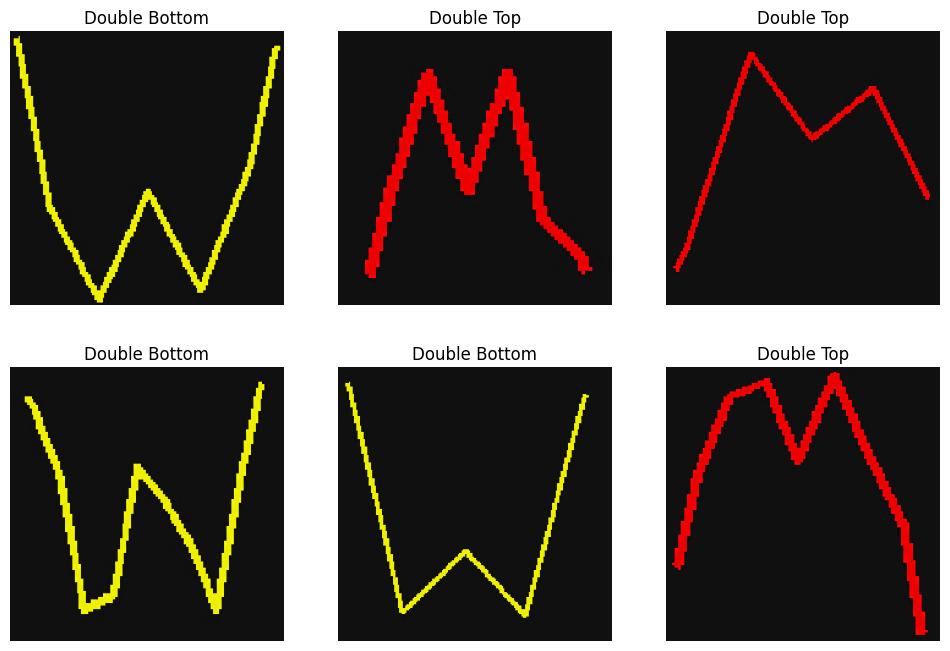

In [10]:
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[i])
    plt.axis('off')

plt.show()

# ***BUILDING AN APPROPRIATE MACHINE LEARNING ALGORITHM***
---
# ***BUILDING AN CNN ARCHETECTURE***

# ***IMPORTING THE LIBRARIES REQUIRED***

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


# ***Split the data into training and testing sets***

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.35, random_state=42)
# Convert labels to categorical format (0 for Double Top, 1 for Double Bottom)
train_labels_cat = to_categorical(train_labels, num_classes=2)
test_labels_cat = to_categorical(test_labels, num_classes=2)

# ***CNN ARCHITECTURE***

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(64, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(128, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(5128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint_callback = ModelCheckpoint('pattern_predictor.h5',  monitor='val_accuracy',  save_best_only=True, mode='max',  verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

#***ARCHITECTURE IS DEFINED !***
#***TRAINING AND EVALUATING THE MODEL***

In [14]:

history = model.fit(train_images, train_labels_cat,
                    epochs=5,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpoint_callback])

test_loss, test_accuracy = model.evaluate(test_images, test_labels_cat)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.9148
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to pattern_predictor.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 87s 14s/step - loss: 0.2832 - accuracy: 0.9148 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9943
Epoch 2: val_accuracy did not improve from 1.00000
6/6 [==============================] - 44s 7s/step - loss: 0.1426 - accuracy: 0.9943 - val_loss: 1.3925e-04 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 1.1515e-08 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
6/6 [==============================] - 44s 7s/step - loss: 1.1515e-08 - accuracy: 1.0000 - val_loss: 1.0141e-04 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9943
Epoch 4: val_accuracy did not improve from 1.00000
6/6 [==============================] - 43s 7s/step - loss: 0.0137 - accuracy: 0.9943 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 

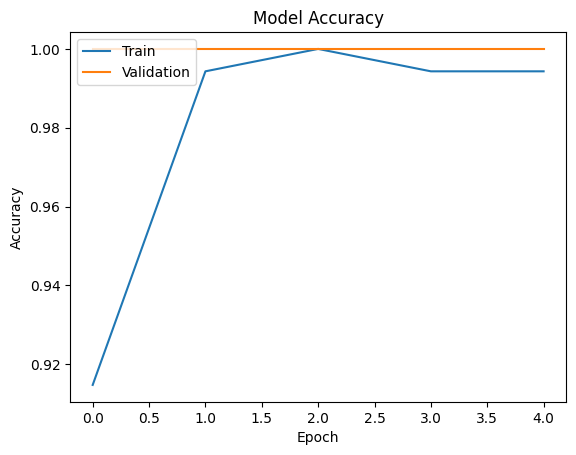

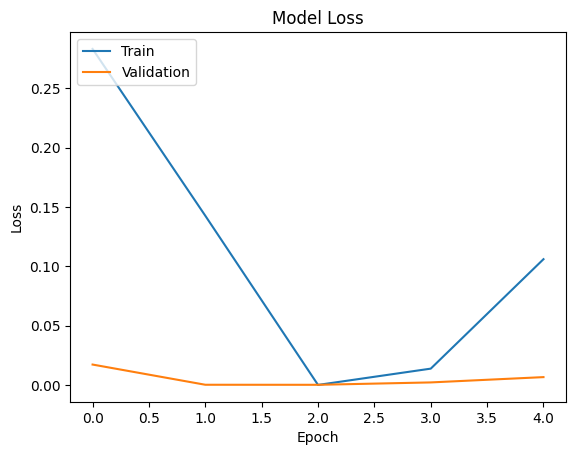

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# ***CONFUSION MATRIX***

4/4 [==============================] - 6s 2s/step


<Figure size 800x600 with 0 Axes>

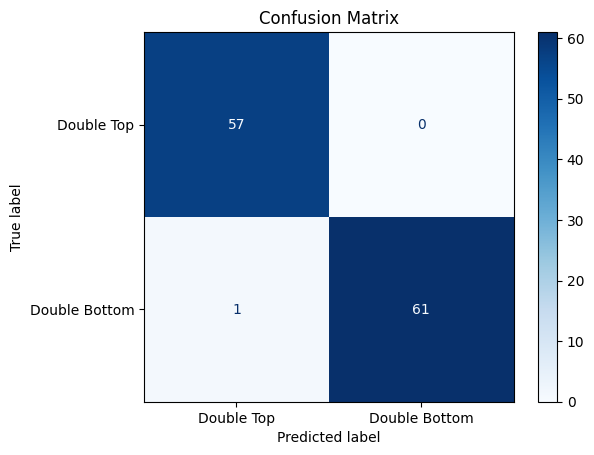

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(test_labels)

cm = confusion_matrix(true_labels, y_pred_classes)

class_names = ['Double Top', 'Double Bottom']

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# ***ROC CURVE***

4/4 [==============================] - 5s 1s/step


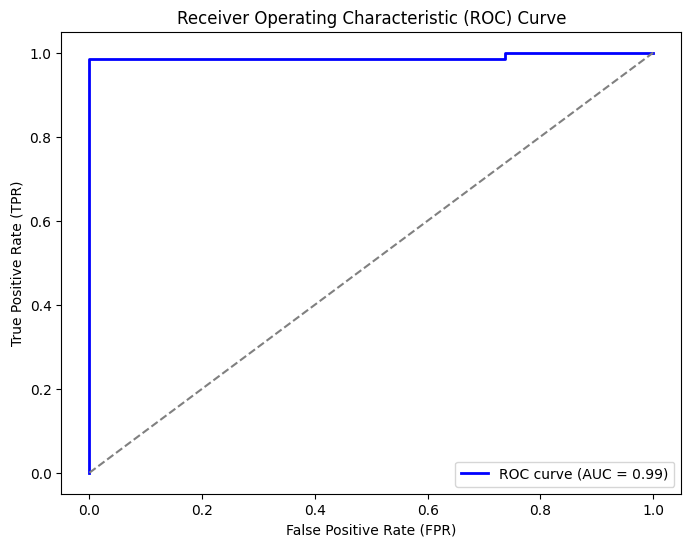

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

y_prob = model.predict(test_images)

label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(test_labels)

fpr, tpr, thresholds = roc_curve(true_labels, y_prob[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# ***TAKING IMAGE(REAL TIME IMAGE) FROM THE USER AND PREDICTING THE CLASS OF THE IMAGE***

FileUpload(value={}, description='Upload')

Button(description='Predict', style=ButtonStyle())

Label(value='')

1/1 [==============================] - 0s 229ms/step


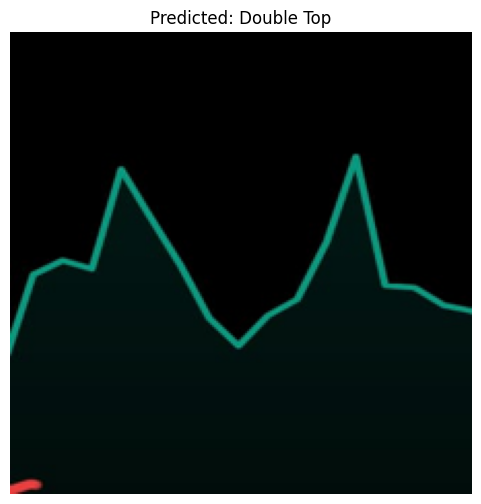

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display
import ipywidgets as widgets

def predict_uploaded_image(change):
    if file_upload_widget.value:
        file_key = list(file_upload_widget.value.keys())[0]
        uploaded_file = file_upload_widget.value[file_key]
        content = uploaded_file['content']

        image = Image.open(io.BytesIO(content))
        image = image.resize((224, 224))
        img_array = img_to_array(image)
        img_array /= 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)

        predicted_class = 'Double Top' if prediction[0][0] >= 0.5 else 'Double Bottom'

        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
        plt.show()

        predicted_class_label.value = f'Predicted: {predicted_class}'
    else:
        print("File upload widget value is empty or does not contain expected keys.")

file_upload_widget = widgets.FileUpload()
predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_uploaded_image)
predicted_class_label = widgets.Label()

display(file_upload_widget)
display(predict_button)
display(predicted_class_label)


# ***Everything works fine ! for images with the multiple pattern or image of a graph lets break image into sub images and preddict pattern individually in them***

# ***Find the countour line in the images***

Saving WhatsApp Image 2024-04-13 at 18.30.11_a658a3a3.jpg to WhatsApp Image 2024-04-13 at 18.30.11_a658a3a3.jpg


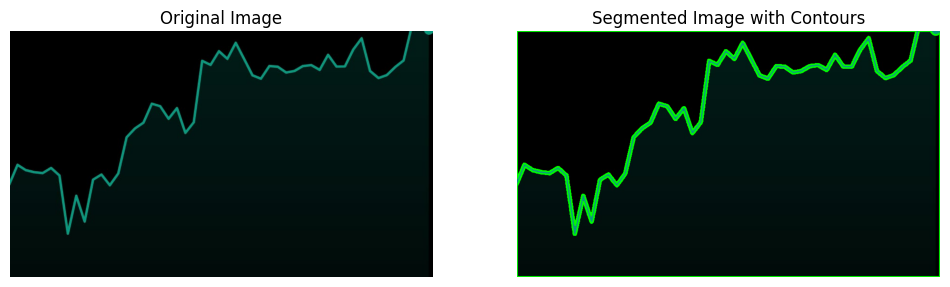

In [24]:
import cv2
import numpy as np
from google.colab import files
import io
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()


for filename in uploaded.keys():

    image_data = uploaded[filename]
    img = Image.open(io.BytesIO(image_data))

    img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_contour = img_cv2.copy()
    cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image with Contours')
    plt.axis('off')

    plt.show()


# ***BREAKING THE IMAGES INTO SUB IMAGES AND REMOVING THE SUB IMAGES WHICH DONOT HAVE COUNTOUR LINES IN THEM***

Saving WhatsApp Image 2024-04-13 at 18.30.11_a658a3a3.jpg to WhatsApp Image 2024-04-13 at 18.30.11_a658a3a3 (2).jpg


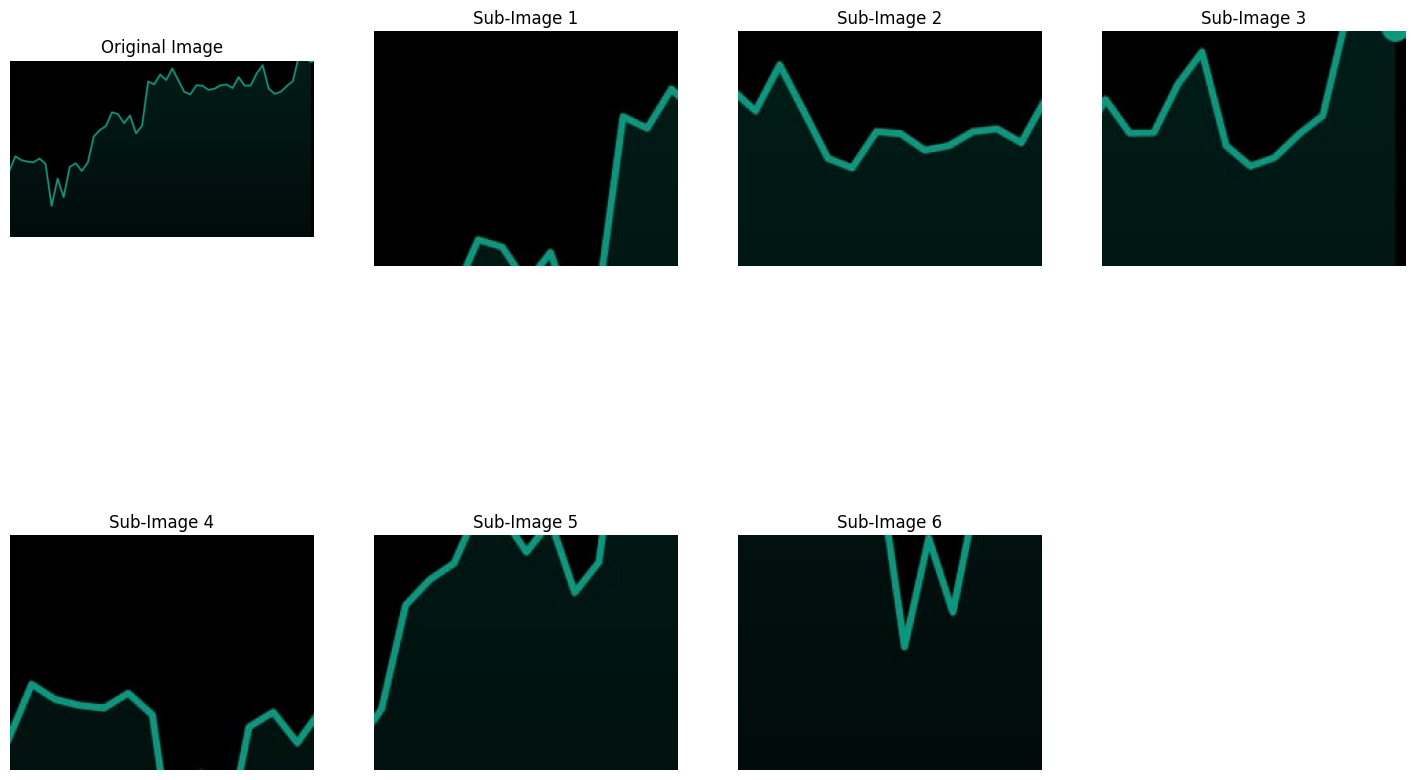

In [27]:
import cv2
import numpy as np
from google.colab import files
import io
from PIL import Image
import matplotlib.pyplot as plt


def extract_sub_images(img, num_rows, num_cols):
    sub_images = []
    height, width = img.shape[:2]
    block_height = height // num_rows
    block_width = width // num_cols

    for i in range(num_rows):
        for j in range(num_cols):
            y1 = i * block_height
            y2 = (i + 1) * block_height
            x1 = j * block_width
            x2 = (j + 1) * block_width

            sub_image = img[y1:y2, x1:x2]

            sub_images.append(sub_image)

    return sub_images

def detect_contours_and_filter(sub_images):
    filtered_sub_images = []
    for sub_image in sub_images:
        gray = cv2.cvtColor(sub_image, cv2.COLOR_BGR2GRAY)

        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        edges = cv2.Canny(blurred, 50, 150)

        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) > 0:
            filtered_sub_images.append(sub_image)

    return filtered_sub_images

uploaded = files.upload()
for filename in uploaded.keys():
    image_data = uploaded[filename]
    img = Image.open(io.BytesIO(image_data))
    img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    num_rows = 3
    num_cols = 4
    sub_images = extract_sub_images(img_cv2, num_rows, num_cols)
    filtered_sub_images = detect_contours_and_filter(sub_images)
    plt.figure(figsize=(18, 12))
    plt.subplot(len(filtered_sub_images) // num_cols + 1, num_cols, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    for i, sub_image in enumerate(filtered_sub_images):
        plt.subplot(len(filtered_sub_images) // num_cols + 1, num_cols, i + 2)
        plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Sub-Image {i + 1}')
        plt.axis('off')

    plt.show()


# ***NOW PREDICTING THE CLASS THE REST IMAGES***

Saving WhatsApp Image 2024-07-05 at 20.25.59_6f0a7af0.jpg to WhatsApp Image 2024-07-05 at 20.25.59_6f0a7af0 (2).jpg
1/1 [==============================] - 0s 104ms/step


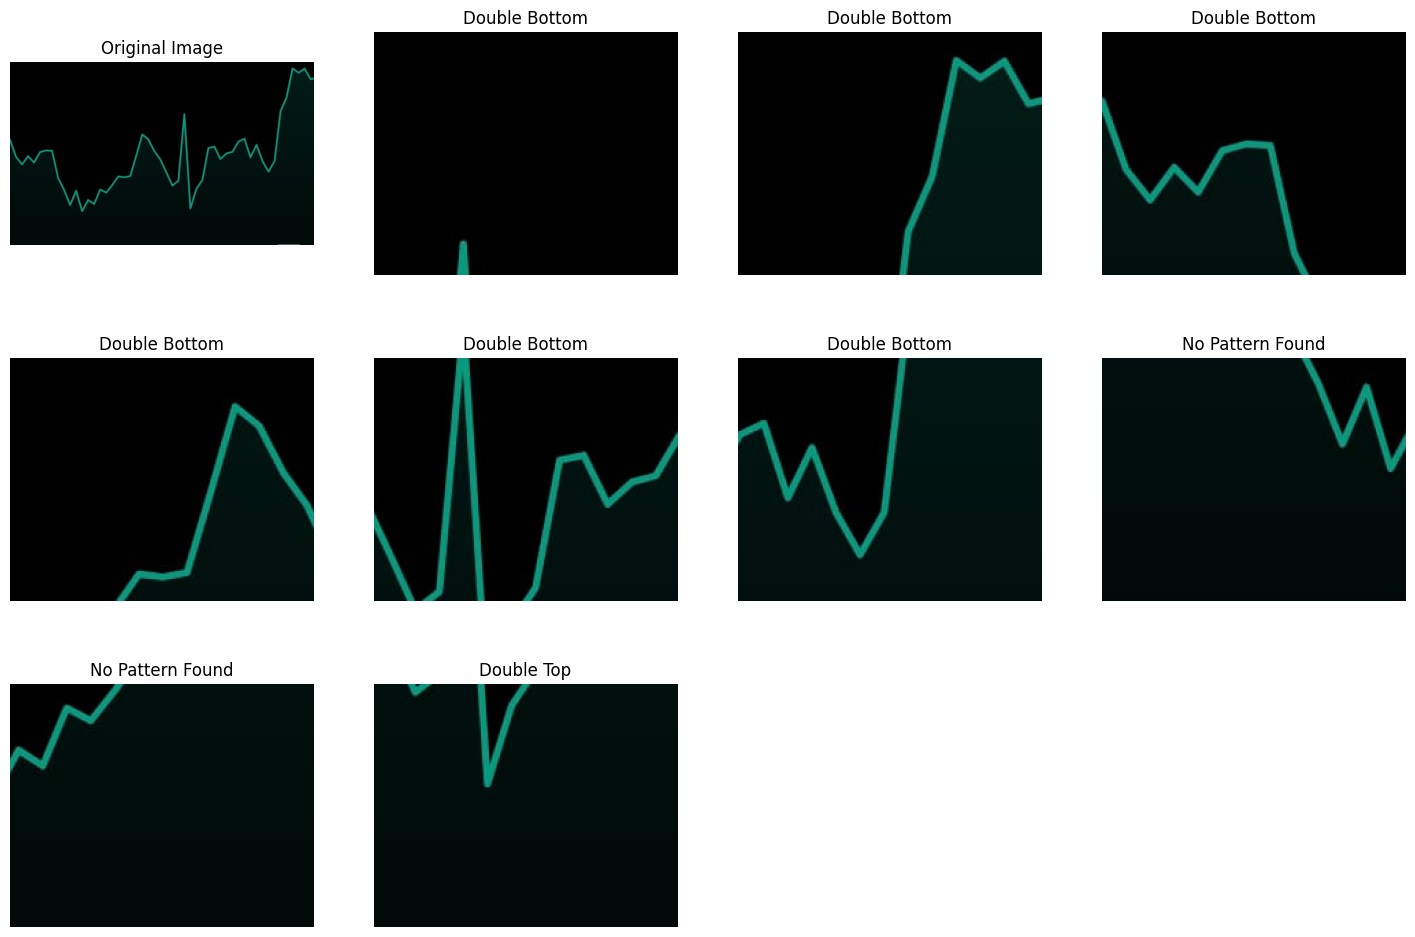

In [1]:
import cv2
import numpy as np
from google.colab import files
import io
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


def extract_sub_images(img, num_rows, num_cols):
    sub_images = []
    height, width = img.shape[:2]
    block_height = height // num_rows
    block_width = width // num_cols
    for i in range(num_rows):
        for j in range(num_cols):
            y1 = i * block_height
            y2 = (i + 1) * block_height
            x1 = j * block_width
            x2 = (j + 1) * block_width
            sub_image = img[y1:y2, x1:x2]
            sub_images.append(sub_image)
    return sub_images
def detect_contours_and_filter(sub_images):
    filtered_sub_images = []
    for sub_image in sub_images:
        gray = cv2.cvtColor(sub_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            filtered_sub_images.append(sub_image)
    return filtered_sub_images
def predict_pattern(model, sub_image):
    resized_image = cv2.resize(sub_image, (224, 224))
    normalized_image = resized_image.astype('float32') / 255.0
    normalized_image = np.expand_dims(normalized_image, axis=0)
    prediction = model.predict(normalized_image)
    if prediction[0][0] > 0.8:
        return "Double Top"
    elif prediction[0][1] > 0.8:
        return "Double Bottom"
    else:
        return "No Pattern Found"
uploaded = files.upload()
model = load_model('pattern_predictor.h5')

for filename in uploaded.keys():
    image_data = uploaded[filename]
    img = Image.open(io.BytesIO(image_data))
    img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    num_rows = 3
    num_cols = 4
    sub_images = extract_sub_images(img_cv2, num_rows, num_cols)
    filtered_sub_images = detect_contours_and_filter(sub_images)
    plt.figure(figsize=(18, 12))
    plt.subplot(len(filtered_sub_images) // num_cols + 1, num_cols, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    for i, sub_image in enumerate(filtered_sub_images):
        plt.subplot(len(filtered_sub_images) // num_cols + 1, num_cols, i + 2)
        plt.imshow(cv2.cvtColor(sub_image, cv2.COLOR_BGR2RGB))
        pattern = predict_pattern(model, sub_image)
        plt.title(pattern)
        plt.axis('off')
    plt.show()